In [15]:
# Ayush Pandhi & Chloe Cheng [University of Toronto]

# Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
from time import time

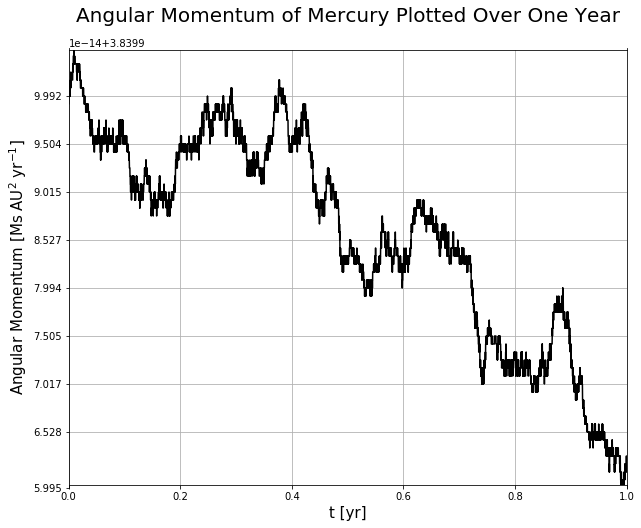

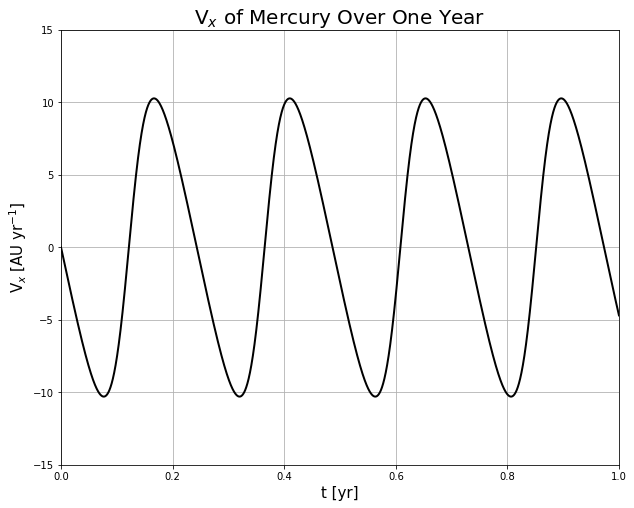

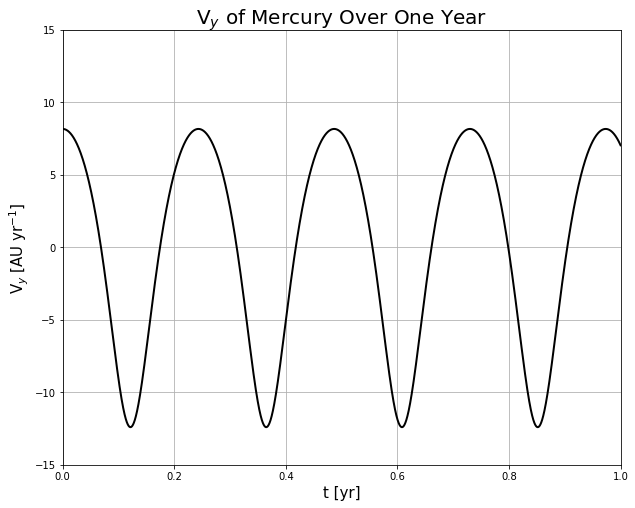

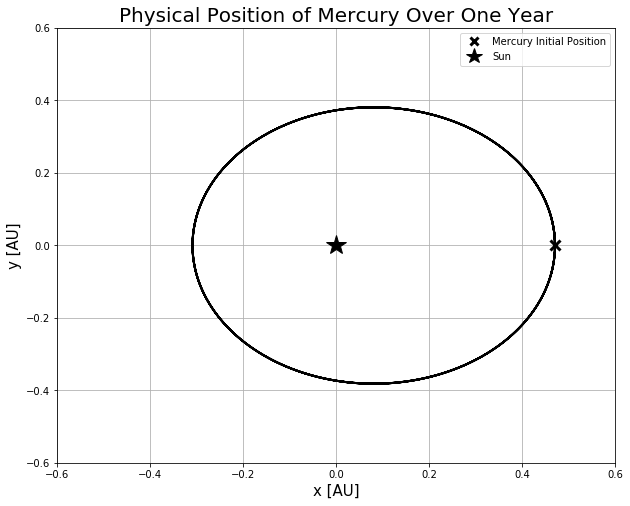

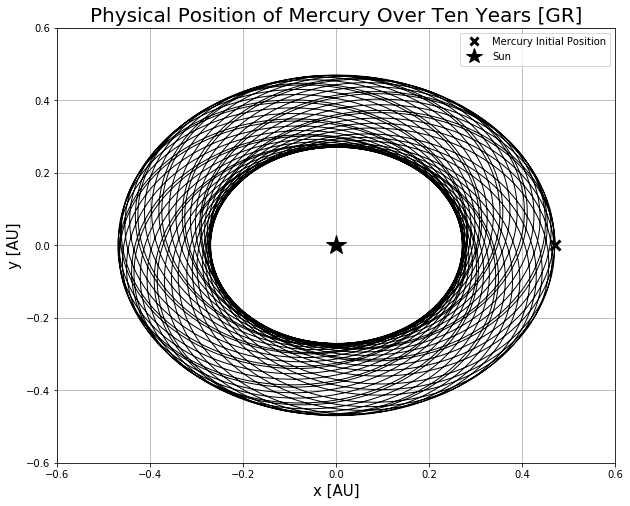

In [16]:
#-------------------------------------------------------------------------------------
#                                     PROBLEM 1
#-------------------------------------------------------------------------------------

# Defining constants
G = 39.5                        #AU^3 Ms^-1 yr^-2
alpha = 0.01                    #AU^2

# Defining initial conditions for Mercury
x0 = 0.47                       # AU, initial x-position
y0 = 0.00                       # AU, initial y-position
vx0 = 0.00                      # AU/yr, initial x-velocity
vy0 = 8.17                      # AU/yr, initial y-velocity
dt = 0.0001                     # yr, time-step
t = np.arange(0.0, 1.0, dt)     # yr, integration time
npts = len(t)                   # number of points

# Set up numerical integration with placeholder arrays
xn = np.zeros(npts)
yn = np.zeros(npts)
vxn = np.zeros(npts)
vyn = np.zeros(npts)
xn[0] = x0
yn[0] = y0
vxn[0] = vx0
vyn[0] = vy0

# Using a recursion scheme to numerically integrate the orbit (Euler-Cromer method)
for i in range(1, npts):
    vxn[i] = vxn[i-1] - ((G*xn[i-1]*dt)/(((xn[i-1]**2 + yn[i-1]**2)**(1/2))**3))
    vyn[i] = vyn[i-1] - ((G*yn[i-1]*dt)/(((xn[i-1]**2 + yn[i-1]**2)**(1/2))**3))
    xn[i] = xn[i-1] + vxn[i]*dt
    yn[i] = yn[i-1] + vyn[i]*dt

#Computing angular momentum
ang_mom = (xn*vyn) - (yn*vxn)

#Plotting angular momentum over time
plt.figure(figsize=(10,8))
plt.title('Angular Momentum of Mercury Plotted Over One Year', y=1.05, fontsize=20)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('Angular Momentum [Ms AU$^{2}$ yr$^{-1}$]', fontsize=15)
plt.plot(t, ang_mom, 'k-')
plt.xlim(0,1)
plt.ylim(np.min(ang_mom), np.max(ang_mom))
plt.grid()
plt.savefig('Q1_angmomentum.pdf')
plt.show()

# Plotting vx over one year
plt.figure(figsize=(10,8))
plt.title('V$_x$ of Mercury Over One Year', fontsize=20)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('V$_x$ [AU yr$^{-1}$]', fontsize=15)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t,vxn, 'k-', linewidth=2)
plt.grid()
plt.savefig('Q1_vx_1year.pdf')
plt.show()

#Plotting vy over one year
plt.figure(figsize=(10,8))
plt.title('V$_y$ of Mercury Over One Year', fontsize=20)
plt.xlabel('t [yr]', fontsize=15)
plt.ylabel('V$_y$ [AU yr$^{-1}$]', fontsize=15)
plt.xlim(0, 1)
plt.ylim(-15, 15)
plt.plot(t,vyn, 'k-', linewidth=2)
plt.grid()
plt.savefig('Q1_vy_1year.pdf')
plt.show()

#Plotting the position of Mercury over one year
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over One Year', fontsize=20)
plt.xlabel('x [AU]', fontsize=15)
plt.ylabel('y [AU]', fontsize=15)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(xn, yn, 'k-', linewidth=2)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.legend(markerscale=0.8)
plt.savefig('Q1_orbit_1year.pdf')
plt.show()

# REDO WITH GR EQUATION (ADD THE ALPHA TERM)

# Changing integration time to 10 years to see multiple orbits
t2 = np.arange(0.0, 10.0, dt)     # yr, integration time
npts2 = len(t2)                   # number of points

# Setting up numerical integration with intial conditions
xn2 = np.zeros(npts2)
yn2 = np.zeros(npts2)
vxn2 = np.zeros(npts2)
vyn2 = np.zeros(npts2)
xn2[0] = x0
yn2[0] = y0
vxn2[0] = vx0
vyn2[0] = vy0

# Using a recursion scheme to numerically integrate the orbit (with alpha term)
for i in range(1, npts2):
    vxn2[i] = vxn2[i-1] - (((G*xn2[i-1]*dt)/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**3))*(1 + (alpha/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**2))))
    vyn2[i] = vyn2[i-1] - (((G*yn2[i-1]*dt)/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**3))*(1 + (alpha/(((xn2[i-1]**2 + yn2[i-1]**2)**(1/2))**2))))
    xn2[i] = xn2[i-1] + vxn2[i]*dt
    yn2[i] = yn2[i-1] + vyn2[i]*dt
    
# Plotting the position of Mercury over 10 years with the GR equation
plt.figure(figsize=(10,8))
plt.title('Physical Position of Mercury Over Ten Years [GR]', fontsize=20)
plt.xlabel('x [AU]', fontsize=15)
plt.ylabel('y [AU]', fontsize=15)
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.plot(xn2, yn2, 'k-', linewidth=1)
plt.plot(x0, y0, 'kx', markeredgewidth=3, markersize=10, label='Mercury Initial Position')
plt.plot(0, 0, 'k*', markeredgewidth=1, markersize=20, label='Sun')
plt.grid()
plt.legend(markerscale=0.8)
plt.savefig('Q1_grorbit_10years.pdf')
plt.show()

Testing the z-theta relationship at z=0 and z=0.707:
At a height z=0, the relfection angle is 180.0 degrees
At a height z=0.707, the reflection angle is 90.01730332567597 degrees



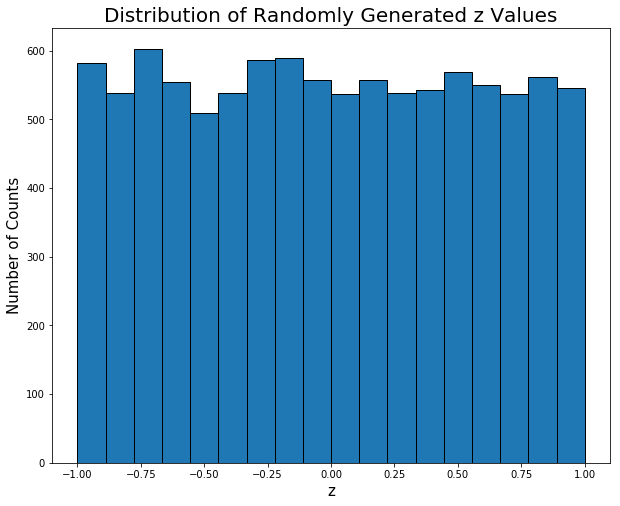

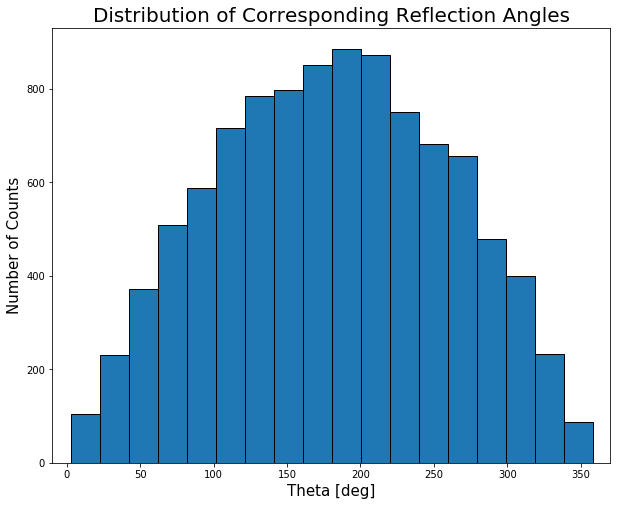

Finding relative probabilities:
The relative probability of finding a particle in the range 175° < θ < 185° versus 20° < θ < 30° is 60.41379310344828
The relative probability of finding a particle in the range 170° < θ < 190° versus 90° < θ < 110° is 1.3396226415094339

Checking if the probability is changed if N is doubled:
The relative probability of finding a particle in the range 175° < θ < 185° versus 20° < θ < 30° with 2*N is 54.747368421052634
The relative probability of finding a particle in the range 170° < θ < 190° versus 90° < θ < 110° with 2*N is 1.309901738473167


In [17]:
#-------------------------------------------------------------------------------------
#                                       PROBLEM 2
#-------------------------------------------------------------------------------------

# Defining a z value in the given range for N particles
N = 10000
z = random(N)*2 - 1
z2 = random(2*N)*2 - 1      #Used later for relative probability computations for 2*N particles

# Defining theta based on z (derived in the pdf report)
theta = (np.pi - 2*np.arcsin(z))*(180/np.pi)
theta2 = (np.pi - 2*np.arcsin(z2))*(180/np.pi)

#Checking if it matches the required conditions
print('Testing the z-theta relationship at z=0 and z=0.707:')
print('At a height z=0, the relfection angle is', (np.pi - 2*np.arcsin(0))*(180/np.pi), 'degrees')
print('At a height z=0.707, the reflection angle is', (np.pi - 2*np.arcsin(0.707))*(180/np.pi), 'degrees')
print()

# Plotting a histogram of randomly generated z values
plt.figure(figsize=(10,8))
plt.title('Distribution of Randomly Generated z Values', fontsize=20)
plt.xlabel('z', fontsize=15)
plt.ylabel('Number of Counts', fontsize=15)
plt.xlim(-1.1, 1.1)
plt.hist(z, bins=18, range=(-1,1), edgecolor='k')
plt.savefig('Q2_zhist.pdf')
plt.show()

#Plotting a histogram of output theta values
plt.figure(figsize=(10,8))
plt.title('Distribution of Corresponding Reflection Angles', fontsize=20)
plt.xlabel('Theta [deg]', fontsize=15)
plt.ylabel('Number of Counts', fontsize=15)
plt.xlim(-10, 370)
plt.hist(theta, bins=18, edgecolor='k')
plt.savefig('Q2_thetahist.pdf')
plt.show()

#Finding the relative probability for 175-185 degrees vs. 20-30 degrees

#Finding the indicies for theta between 175-185 degrees
theta175_list = np.where(theta < 175.0)
theta175_idx = theta175_list[0]
theta185_list = np.where(theta > 185.0)
theta185_idx = theta175_list[0]
index_175_185 = np.hstack((theta175_idx, theta185_idx))

#Using np.delete to remove the indicies from the array
theta_175_185 = np.delete(theta, index_175_185)
count1 = theta_175_185.shape[0]

#Finding the indicies for theta between 20-30 degrees
theta20_list = np.where(theta < 20.0)
theta20_idx = theta20_list[0]
theta30_list = np.where(theta > 30.0)
theta30_idx = theta30_list[0]
index_20_30 = np.hstack((theta20_idx, theta30_idx))

#Using np.delete to remove the indicies from the array
theta_20_30 = np.delete(theta, index_20_30)
count2 = theta_20_30.shape[0]

#Finding the relative probability for 170-190 degrees vs. 90-110 degrees

#Finding the indicies for theta between 170-190 degrees
theta170_list = np.where(theta < 170.0)
theta170_idx = theta170_list[0]
theta190_list = np.where(theta > 190.0)
theta190_idx = theta190_list[0]
index_170_190 = np.hstack((theta170_idx, theta190_idx))

#Using np.delete to remove the indicies from the array
theta_170_190 = np.delete(theta, index_170_190)
count3 = theta_170_190.shape[0]

#Finding the indicies for theta between 90-110 degrees
theta90_list = np.where(theta < 90.0)
theta90_idx = theta90_list[0]
theta110_list = np.where(theta > 110.0)
theta110_idx = theta110_list[0]
index_90_110 = np.hstack((theta90_idx, theta110_idx))

#Using np.delete to remove the indicies from the array
theta_90_110 = np.delete(theta, index_90_110)
count4 = theta_90_110.shape[0]

#Printing the relative probability
print('Finding relative probabilities:')
print('The relative probability of finding a particle in the range 175° < θ < 185° versus 20° < θ < 30° is', count1/count2)
print('The relative probability of finding a particle in the range 170° < θ < 190° versus 90° < θ < 110° is', count3/count4)
print()

#Checking if this probability changes if we double N

#Finding the relative probability for 175-185 degrees vs. 20-30 degrees for 2*N

#Finding the indicies for theta between 175-185 degrees
theta175_list2 = np.where(theta2 < 175.0)
theta175_idx2 = theta175_list2[0]
theta185_list2 = np.where(theta2 > 185.0)
theta185_idx2 = theta175_list2[0]
index_175_185_2 = np.hstack((theta175_idx2, theta185_idx2))

#Using np.delete to remove the indicies from the array
theta_175_185_2 = np.delete(theta2, index_175_185_2)
count5 = theta_175_185_2.shape[0]

#Finding the indicies for theta between 20-30 degrees
theta20_list2 = np.where(theta2 < 20.0)
theta20_idx2 = theta20_list2[0]
theta30_list2 = np.where(theta2 > 30.0)
theta30_idx2 = theta30_list2[0]
index_20_30_2 = np.hstack((theta20_idx2, theta30_idx2))

#Using np.delete to remove the indicies from the array
theta_20_30_2 = np.delete(theta2, index_20_30_2)
count6 = theta_20_30_2.shape[0]

#Finding the relative probability for 170-190 degrees vs. 90-110 degrees for 2*N

#Finding the indicies for theta between 170-190 degrees
theta170_list2 = np.where(theta2 < 170.0)
theta170_idx2 = theta170_list2[0]
theta190_list2 = np.where(theta2 > 190.0)
theta190_idx2 = theta190_list2[0]
index_170_190_2 = np.hstack((theta170_idx2, theta190_idx2))

#Using np.delete to remove the indicies from the array
theta_170_190_2 = np.delete(theta2, index_170_190_2)
count7 = theta_170_190_2.shape[0]

#Finding the indicies for theta between 90-110 degrees
theta90_list2 = np.where(theta2 < 90.0)
theta90_idx2 = theta90_list2[0]
theta110_list2 = np.where(theta2 > 110.0)
theta110_idx2 = theta110_list2[0]
index_90_110_2 = np.hstack((theta90_idx2, theta110_idx2))

#Using np.delete to remove the indicies from the array
theta_90_110_2 = np.delete(theta2, index_90_110_2)
count8 = theta_90_110_2.shape[0]

#Printing relative probability for 2*N
print('Checking if the probability is changed if N is doubled:')
print('The relative probability of finding a particle in the range 175° < θ < 185° versus 20° < θ < 30° with 2*N is', count5/count6)
print('The relative probability of finding a particle in the range 170° < θ < 190° versus 90° < θ < 110° with 2*N is', count7/count8)

Matrix multiplication results: 
2 0.0
3 0.0010027885437011719
4 0.0
5 0.0
6 0.0
7 0.0009984970092773438
8 0.0
9 0.00099945068359375
10 0.00099945068359375
11 0.001998424530029297
12 0.0009996891021728516
13 0.002997875213623047
14 0.0029985904693603516
15 0.003997325897216797
16 0.003997802734375
17 0.0049970149993896484
18 0.0059964656829833984
19 0.007012367248535156
20 0.007994413375854492
21 0.008979558944702148
22 0.009993791580200195
23 0.012992143630981445
24 0.0159914493560791
25 0.02398681640625
26 0.02000260353088379
27 0.023972034454345703
28 0.026984691619873047
29 0.02498483657836914
30 0.027982711791992188
31 0.0339818000793457
32 0.04897189140319824
33 0.03697919845581055
34 0.03997540473937988
35 0.04299044609069824
36 0.04695701599121094
37 0.05298495292663574
38 0.05495262145996094
39 0.05996370315551758
40 0.06397867202758789
41 0.07095885276794434
42 0.07495665550231934
43 0.08000636100769043
44 0.09494400024414062
45 0.10493993759155273
46 0.09795761108398438
47 0.

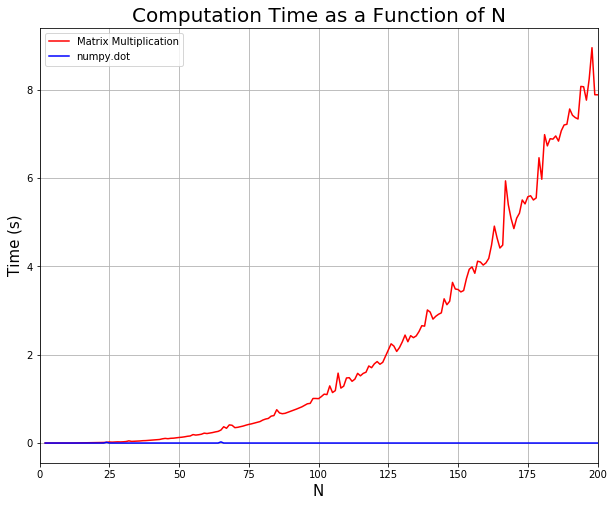

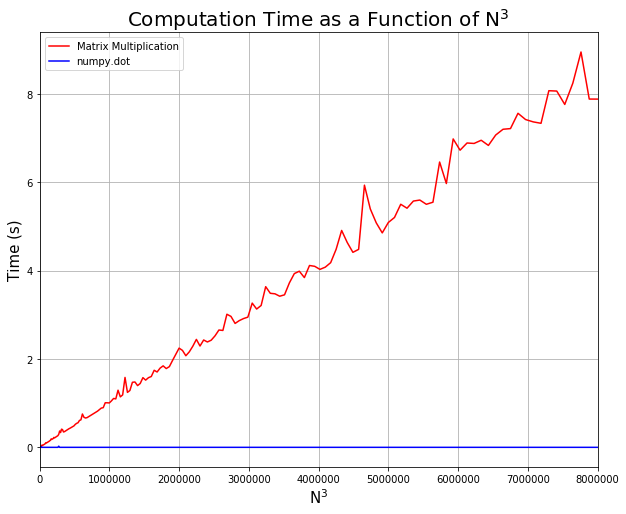

In [18]:
#-------------------------------------------------------------------------------------
#                                     PROBLEM 3
#-------------------------------------------------------------------------------------

#Below we perform matrix multiplication using several for-loops, as in Example 4.3 from Newman (2013)
N = np.arange(2, 201) #Create an array of sizes to use in matrices
times = np.zeros(len(N)) #Create an empty array for total times to add to later
start = np.zeros(len(N)) #Create an empty array of start times
end = np.zeros(len(N)) #Create an empty array of end times
print("Matrix multiplication results: ") 
for i in range(len(N)): #Loop through all values in N
    start[i] = time() #Define start times
    A = np.ones([N[i], N[i]], float)*3 #Create a constant matrix A for each size N
    B = np.ones([N[i], N[i]], float)*3 #Create a constant matrix B for each size N
    C = np.zeros([N[i], N[i]], float) #Create an empty matrix C for each size N to add to in matrix multiplication
    for j in range(N[i]): #Loop through values of N 3 times
        for k in range(N[i]):
            for l in range(N[i]):
                C[j,k] += A[j,l]*B[l,k] #Matrix multiplication added into C
    end[i] = time() #Define end time
    times[i] = end[i] - start[i] #Get total computational time for each matrix multiplication by taking the difference of the start and end times
    print(N[i], times[i]) #Print value of N and corresponding time

#Here we perform matrix multiplication using numpy.dot
times_dot = np.zeros(len(N)) #Create new empty array for total times to add to later
start_dot = np.zeros(len(N)) #Create new empty array for start times
end_dot = np.zeros(len(N)) #Create new empty array for end times
print("numpy.dot results: ")
for i in range(len(N)): #Loop through all values of N
    start_dot[i] = time() #Define start times
    A_dot = np.ones([N[i], N[i]], float)*3 #Create a constant matrix A for each size N
    B_dot = np.ones([N[i], N[i]], float)*3 #Create a constant matrix B for each size N
    C_dot = np.dot(A_dot, B_dot) #Do matrix multiplication using numpy.dot and assign it to variable C
    end_dot[i] = time() #Define end times
    times_dot[i] = end_dot[i] - start_dot[i] #Get total computational time for each matrix multiplication by taking the difference of the start and end times
    print(N[i], times[i]) #Print value of N and corresponding time
    
#Plot computation time as a function of N
plt.figure(figsize=(10,8)) #Increase figure size
plt.plot(N, times, 'r', label='Matrix Multiplication') #Plot for-loop matrix multiplication times in red
plt.plot(N, times_dot, 'b', label='numpy.dot') #Plot numpy.dot matrix multiplication times in blue
plt.title("Computation Time as a Function of N", fontsize=20) #Make a title 
plt.xlabel("N", fontsize=15) #Make an x-axis label
plt.ylabel("Time (s)",fontsize=15) #Make a y-axis label
plt.xlim(0,np.max(N)) #Set the limits of the x-axis to make the plot look nice
plt.grid() #Make a grid to make the plot look nice
plt.legend() #Show the legend
plt.savefig('PHY407L1Q3_N.pdf') #Save plot as a PDF
plt.show()

#Plot computation time as function of N^3
plt.figure(figsize=(10,8)) #Increase figure size
plt.plot(N**3, times, 'r', label='Matrix Multiplication') #Plot for-loop matrix multiplication times in red
plt.plot(N**3, times_dot, 'b', label='numpy.dot') #Plot numpy.dot matrix multiplication times in blue
plt.title("Computation Time as a Function of N$^{3}$", fontsize=20) #Make a title 
plt.xlabel("N$^3$",fontsize=15) #Make an x-axis label
plt.ylabel("Time (s)",fontsize=15) #Make a y-axis label
plt.xlim(0,np.max(N**3)) #Set the limits of the x-axis to make the plot look nice
plt.grid() #Make a grid to make the plot look nice
plt.legend() #Show the legend
plt.savefig('PHY407L1Q3_N3.pdf') #Save plot as a PDF
plt.show()